In [1]:
# Step 1: Setup the Environment
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00


In [2]:
# Step 2: Download Pre-trained Models
from ultralytics import YOLO, SAM

# Download a standard YOLOv8 detection model
yolo_model = YOLO("yolov8n.pt")

# Download a SAM 2 segmentation model
sam_model = SAM("sam2_b.pt")

print("YOLOv8 and SAM2 models downloaded.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 and SAM2 models downloaded.


In [3]:
# Step 3: Download a Test Image
!wget -O person_test.jpg https://ultralytics.com/images/bus.jpg

--2025-10-01 12:09:46--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 99.83.190.102, 75.2.70.75
Connecting to ultralytics.com (ultralytics.com)|99.83.190.102|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2025-10-01 12:09:47--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 172.64.147.154, 104.18.40.102, 2a06:98c1:3107::6812:2866, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|172.64.147.154|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2025-10-01 12:09:47--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP requ

Segmented image saved as person_segmented.jpg


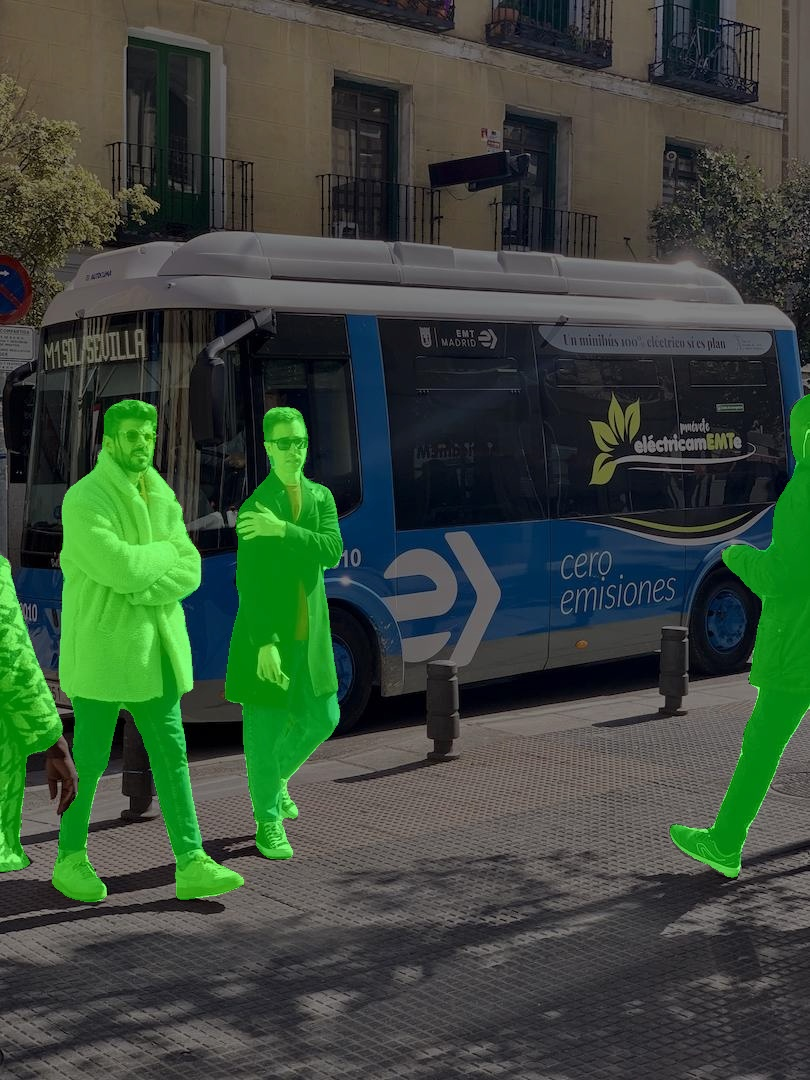

In [7]:
# Step 4: Implement the Two-Stage Pipeline
from ultralytics import YOLO, SAM
import cv2
import numpy as np
from IPython.display import display, Image

# Load the YOLO and SAM models (they should be downloaded from Step 2)
yolo_model = YOLO("yolov8n.pt")
sam_model = SAM("sam2_b.pt")

# Load the test image
image_path = "person_test.jpg"
img = cv2.imread(image_path)

# Run the YOLO detector on the image to get bounding boxes for 'person' objects (class ID 0 in COCO dataset)
# Using verbose=False to avoid printing output for each image
yolo_results = yolo_model(img, classes=[0], verbose=False) # classes=[0] for 'person' class

# Process YOLO results and get bounding boxes for persons
person_boxes = []
for result in yolo_results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get boxes in xyxy format
    person_boxes.extend(boxes)

# If persons are detected, use SAM to segment them
if len(person_boxes) > 0:
    # Pass the original image and the person-bounding-boxes to the SAM model
    # Using verbose=False to avoid printing output for each image
    sam_results = sam_model(img, bboxes=np.array(person_boxes), verbose=False)

    # Create a blank mask image
    mask_img = np.zeros_like(img)

    # Draw the segmentation masks on the blank image
    for result in sam_results:
        if result.masks is not None:
            masks = result.masks.data.cpu().numpy()
            for mask in masks:
                # Resize mask to original image size if necessary
                if mask.shape[:2] != img.shape[:2]:
                    mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
                # Apply a color to the mask (e.g., green)
                mask_img[mask > 0] = (0, 255, 0) # Green color for masks

    # Blend the original image with the mask
    alpha = 0.5 # Transparency factor
    segmented_img = cv2.addWeighted(img, 1 - alpha, mask_img, alpha, 0)

    # Save the segmented image
    segmented_image_path = "person_segmented.jpg"
    cv2.imwrite(segmented_image_path, segmented_img)

    # Display the final segmented image
    print(f"Segmented image saved as {segmented_image_path}")
    display(Image(segmented_image_path))
else:
    print("No persons detected in the image.")

In [6]:
# Step 5: Package the Models for Download
import zipfile
import os

model_files = ["yolov8n.pt", "sam2_b.pt"]
zip_file_name = "models_for_project.zip"

with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file in model_files:
        if os.path.exists(file):
            zipf.write(file)
            print(f"Added {file} to {zip_file_name}")
        else:
            print(f"Error: {file} not found.")

print(f"\n'{zip_file_name}' has been created and is ready for download.")

Added yolov8n.pt to models_for_project.zip
Added sam2_b.pt to models_for_project.zip

'models_for_project.zip' has been created and is ready for download.
